In [3]:
import pandas as pd
import numpy as np

# Part 1: Open the velocity model and find the nearest point to our study

In [58]:
data=pd.read_fwf('~/Downloads/casc1.6_velmdl.txt',
                 colspec=((7,12),(19,25),(32,36),(40,43),(47,50)),
                 nrows=4000000,
                 header=None,
                 engine='c'
                )

In [87]:
x0,y0 = 537226, 5330716 # Camano Island State Park

x=np.unique(np.array(data)[:,0])
y=np.unique(np.array(data)[:,1])

xx,yy=np.meshgrid(x,y)
min_index = np.argmin( np.sqrt((xx-x0)**2 + (yy-y0)**2 ))
xm = xx.flatten()[min_index]
ym = yy.flatten()[min_index]
print(f'minimum at: {xm}, {ym}')

minimum at: 537200, 5330800


In [60]:
data.loc[ (data[0]==xx.flatten()[min_index]) & (data[1]==yy.flatten()[min_index]) ]

,0,1,2,3,4
2261739,537200,5330800,60000,8376,4766


In [64]:
file1 = open('/Users/bradlipovsky/Downloads/casc1.6_velmdl.txt', 'r')

In [102]:
import re
p=[]
s=[]
z=[]
for j,line in enumerate(file1):
    listt = re.split('\s+', line)
    x,y,zz,pp,ss=[int(listt[i]) for i in range(1,len(listt)-1)]
    if (x == xm) & (y==ym):
        z.append(zz)
        p.append(pp)
        s.append(ss)
p = np.array(p)
s = np.array(s)
z = np.array(z)

# Part 2: save the model to this notebook so we don't have to search again

In [5]:
p,s,z = (np.array([7698, 7690, 7683, 7677, 7671, 7666, 7661, 7657, 7439, 7425, 7410,
        7394, 7378, 7362, 7346, 7330, 7314, 7299, 7283, 7268, 7254, 7240,
        7226, 7212, 7199, 7186, 7174, 7161, 7149, 7137, 7126, 7117, 7107,
        7097, 7087, 7082, 7078, 7077, 7076, 7077, 7078, 6532, 6520, 6507,
        6493, 6478, 6461, 6444, 6426, 6408, 6388, 6369, 6350, 6331, 6313,
        6296, 6280, 6265, 6251, 6241, 6231, 6226, 6222, 6226, 6230, 6247,
        6265, 6294, 6325, 6360, 6398, 6436, 6473, 6508, 6539, 6564, 6574,
        6587, 6613, 6639, 6599, 6557, 6479, 6394, 6384, 6409, 6410, 6390,
        6344, 6260, 6189, 6156, 6124, 6097, 6070, 6068, 6067, 6058, 6047,
        5893, 5675, 5387, 5040, 4368, 3889, 3449, 3180, 2925, 2814, 1524]),
 np.array([4500, 4495, 4490, 4484, 4478, 4471, 4464, 4457, 4258, 4250, 4242,
        4234, 4226, 4218, 4209, 4201, 4193, 4185, 4176, 4168, 4160, 4153,
        4145, 4137, 4129, 4121, 4114, 4106, 4099, 4092, 4086, 4081, 4076,
        4071, 4066, 4064, 4062, 4062, 4062, 4063, 4063, 3803, 3797, 3790,
        3783, 3775, 3767, 3758, 3749, 3740, 3730, 3721, 3711, 3702, 3693,
        3684, 3676, 3668, 3662, 3656, 3651, 3647, 3645, 3645, 3646, 3654,
        3662, 3676, 3691, 3708, 3725, 3743, 3760, 3776, 3790, 3801, 3805,
        3811, 3822, 3834, 3816, 3798, 3763, 3726, 3722, 3733, 3733, 3724,
        3703, 3666, 3635, 3619, 3604, 3592, 3580, 3580, 3579, 3577, 3573,
        3494, 3380, 3220, 3021, 2184, 1945, 1725, 1590, 1463, 1407,  609]),
 np.array([54500, 54000, 53500, 53000, 52500, 52000, 51500, 51000, 50500,
        50000, 49500, 49000, 48500, 48000, 47500, 47000, 46500, 46000,
        45500, 45000, 44500, 44000, 43500, 43000, 42500, 42000, 41500,
        41000, 40500, 40000, 39500, 39000, 38500, 38000, 37500, 37000,
        36500, 36000, 35500, 35000, 34500, 34000, 33500, 33000, 32500,
        32000, 31500, 31000, 30500, 30000, 29500, 29000, 28500, 28000,
        27500, 27000, 26500, 26000, 25500, 25000, 24500, 24000, 23500,
        23000, 22500, 22000, 21500, 21000, 20500, 20000, 19500, 19000,
        18500, 18000, 17500, 17000, 16500, 16000, 15500, 15000, 14500,
        14000, 13500, 13000, 12500, 12000, 11500, 11000, 10500, 10000,
         9500,  9000,  8500,  8000,  7500,  7000,  6500,  6000,  5500,
         5000,  4500,  4000,  3500,  3000,  2500,  2000,  1500,  1000,
          500,     0]))

# Part 3: calculate density

In [13]:
vp = p/1e3
rho = (1.6612 * vp - 0.4721 * vp**2 + 0.0671 * vp**3 - 0.0043 * vp**4 + 0.000106 * vp**5)*1000

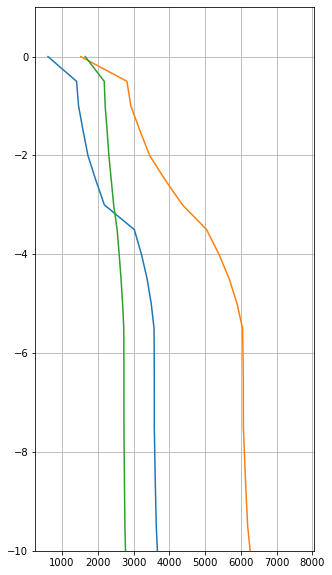

In [32]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(5,10))
fig.patch.set_facecolor('w')
plt.plot(s,-z/1e3)
plt.plot(p,-z/1e3)
plt.plot(rho,-z/1e3)
plt.ylim([-10,1])
plt.grid()
plt.show()

In [30]:
ind = -2
print(f"0.5 {p[ind]/1e3} {s[ind]/1e3} {round(rho[ind])/1e3} 0.0 0.0 0.0 0.0 1.0 1.0")

0.5 2.814 1.407 2.181 0.0 0.0 0.0 0.0 1.0 1.0
